In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [46]:
def get_lower_and_upper_bounds(df_col, multiplier=1.5):
    '''
    Uses IQR*multiplier formular to determine value for upper and lower
    outliers. Returns lower_bound and upper_bound.
    '''
    # determine first and third quartile of column
    Q1 = df_col.quantile(.25)
    Q3 = df_col.quantile(.75)
    # calculate inner quartile range
    IQR = Q3 - Q1
    
    # calculate bounds for outliers
    lower_bound = Q1 - (IQR * multiplier)
    upper_bound = Q3 + (IQR * multiplier)
    
    return lower_bound, upper_bound

## Using lemonade.csv dataset and focusing on continuous variables:

In [6]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv", index_col=0)

In [18]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


In [21]:
df.index = pd.to_datetime(df.index)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


### 1. 
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

Temperature
lower bound: 16.700000000000003
upper_bound: 104.7 



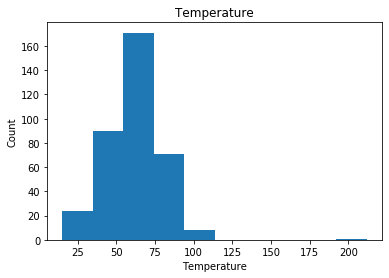

Rainfall
lower bound: 0.26
upper_bound: 1.3 



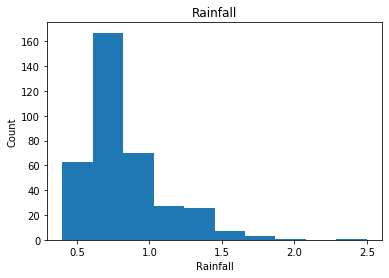

Flyers
lower bound: 4.0
upper_bound: 76.0 



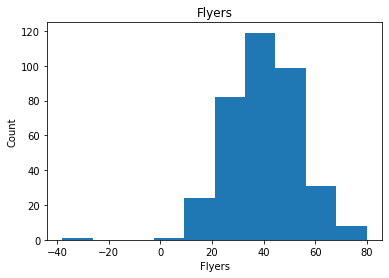

Price
lower bound: 0.5
upper_bound: 0.5 



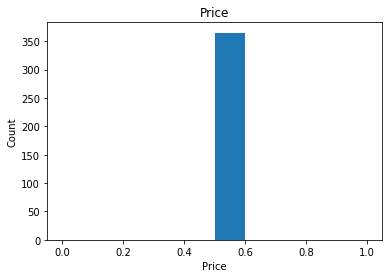

Sales
lower bound: 5.0
upper_bound: 45.0 



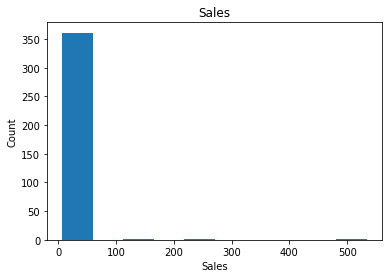

In [61]:
for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Outliers Using 1.5 Rule
- temp
    - outliers make sense
    - temps over 104 would be typos
    - there do not appear to be any lower outliers
- rain
    - does not make sense to have low outliers as long as it is not less than 0
    - upper outliers should also be kept, it is possible for it to rain more than average and still be accurate data
- flyers
    - flyers should not be negative
    - would only remove lower
- price
    - only one price, can probably remove this column, no outliers
- sales
    - lower outliers do not make sense, upper do with higher multiplier

### 2. 
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

Temperature
lower bound: -16.299999999999997
upper_bound: 137.7 



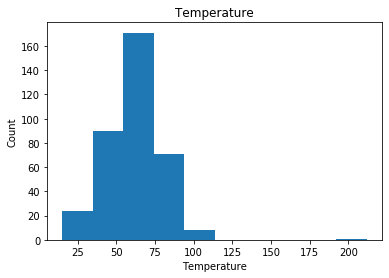

Rainfall
lower bound: -0.13
upper_bound: 1.69 



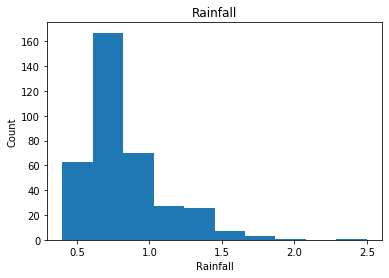

Flyers
lower bound: -23.0
upper_bound: 103.0 



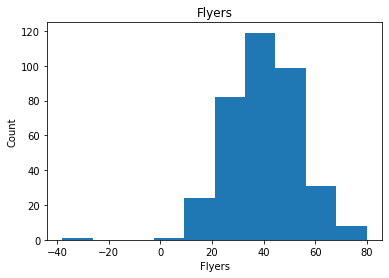

Price
lower bound: 0.5
upper_bound: 0.5 



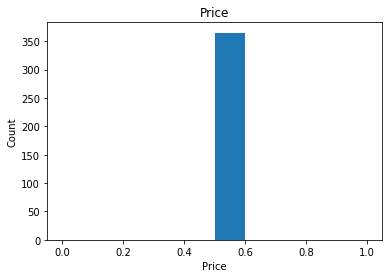

Sales
lower bound: -10.0
upper_bound: 60.0 



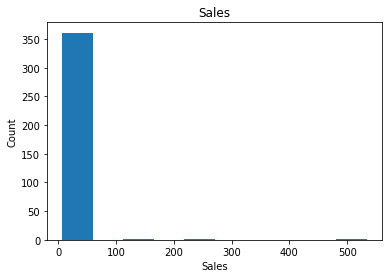

In [62]:
for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier=3)
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

- temp: better with multiplier of 1.5
- rainfall: better with multiplier of 3, though I would leave all data points
- flyers: would use 0 for lower bound, keep everything else
- price: no outliers to remove
- sales: would use multiplier of 3 for upper bound, not remove lowers

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- temperature
- rainfall
- flyers

In [78]:
normal = ['Temperature','Rainfall','Flyers']

### 1. Use a 2 sigma decision rule to isolate the outliers. Do these make sense?

In [79]:
def sigma_outliers(df_col, sigma=2):
    
    # Calculate the z-score
    zscore = abs((df_col.mean()) / (df_col.std()))

    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    
    # Calculate upper bound
    lower_bound = df_col.mean() - (zscore * sigma)
    
    return upper_bound, lower_bound

In [81]:
for col in normal:
    
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")

Temperature
lower bound: 54.45422492031442
upper_bound: 67.99509014817882 

Rainfall
lower bound: -5.205439989806705
upper_bound: 6.857385195286159 

Flyers
lower bound: 34.286205005901834
upper_bound: 45.922014172180354 



### 2. Should certain outliers be kept or removed?

### 4. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [77]:
for col in df.describe().columns:
    
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col], sigma=3)
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")

Temperature
lower bound: 51.069008613348316
upper_bound: 71.38030645514492 

Rainfall
lower bound: -8.221146286079922
upper_bound: 9.873091491559375 

Flyers
lower bound: 31.377252714332208
upper_bound: 48.83096646374998 

Price
lower bound: Nan
upper_bound: Nan 

Sales
lower bound: 25.164548055856507
upper_bound: 30.56695879345856 

